# Dynamic focusing mechanisms

## 1. Objective Moving / Lens Moving

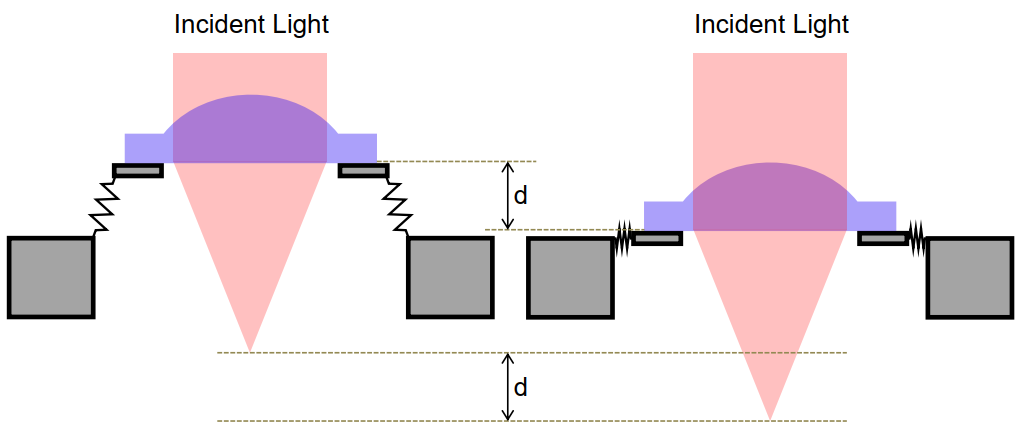

## 2. Tunable Lens / Deformable Mirror

Schematic
1. Tunable lens or deformable structures: low NA
2. 4f/telecentric stucture
3. Objective: high NA
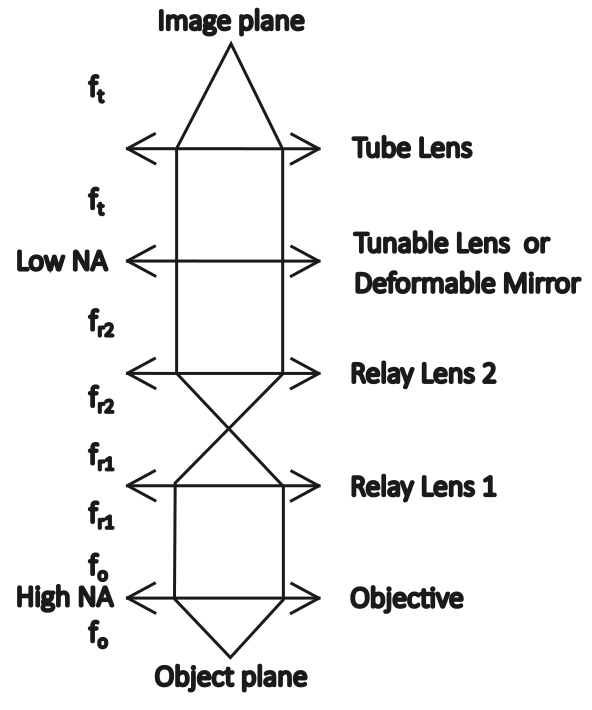

In [1]:
from sympy import symbols, Matrix, simplify, init_printing

f0, fr1, fr2, fx, ft = symbols(["f_0", "f_r1", "f_r2", "f_x", "f_t"])
Mr = symbols("M_r")      # fr2 = Mr*fr1

m = Matrix([[1, ft], [0, 1]]) \
    @ Matrix([[1, 0], [-1/ft, 1]]) \
    @ Matrix([[1, ft], [0, 1]]) \
    @ Matrix([[1, 0], [-1/fx, 1]]) \
    @ Matrix([[1, fr2], [0, 1]]) \
    @ Matrix([[1, 0], [-1/fr2, 1]]) \
    @ Matrix([[1, fr1+fr2], [0, 1]]) \
    @ Matrix([[1, 0], [-1/fr1, 1]]) \
    @ Matrix([[1, f0+fr1], [0, 1]]) \
    @ Matrix([[1, 0], [-1/f0, 1]])             # Objective

print("Systems Matrix")
print(simplify(m.subs(fr2, Mr*fr1)))
print("\n") 

m_inv = m.subs(fr2, Mr*fr1).inv()
print("Inverse Systems Matrix:")
print(simplify(m_inv))

print("\n") 
print("#"*70)
print("Working distance:")
simplify(m_inv[0, 1]/m_inv[1, 1])

Systems Matrix
Matrix([[f_t/(M_r*f_0), M_r*f_0*f_t/f_x - f_t/M_r], [0, M_r*f_0/f_t]])


Inverse Systems Matrix:
Matrix([[M_r*f_0/f_t, -M_r*f_0*f_t/f_x + f_t/M_r], [0, f_t/(M_r*f_0)]])


######################################################################
Working distance:


f_0*(-M_r**2*f_0 + f_x)/f_x

In [2]:
## Focus scan distance  / scanned depth of field
n = symbols("n")    # assuming the object is in a media with refractive index n
df = n*simplify(m_inv[0, 1]/m_inv[1, 1]-f0)
df

-M_r**2*f_0**2*n/f_x

In [3]:
lam, NA = symbols("lambda, NA")
## Depth of field of an objective
dof = n*lam/NA**2
dof

lambda*n/NA**2

In [4]:
## For a deformable mirror
## Parabolic mirror
## https://doi.org/10.1364/OL.42.000995

from sympy.plotting import plot 
from sympy import Eq, pprint

y, x, f, stoke, D = symbols("y x f S D_dm")
print("Parabolic Mirror Equation:")
pprint(Eq(x, y**2/(4*f)))

print("\n")
print("Deformable mirror focus vs stoke")
Eq(f, D**2/(16*stoke))

Parabolic Mirror Equation:
      2
     y 
x = ───
    4⋅f


Deformable mirror focus vs stoke


Eq(f, D_dm**2/(16*S))

## 3. Remote Focusing

Botcherby, Edward J., et al. "An optical technique for remote focusing in microscopy." Optics Communications 281.4 (2008): 880-887. https://doi.org/10.1016/j.optcom.2007.10.007
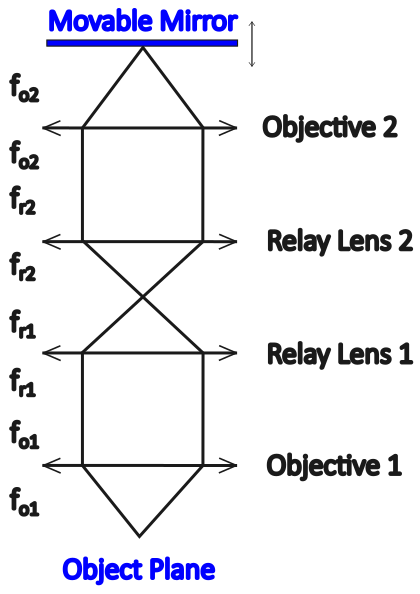

In [5]:
from sympy import *
from sympy.physics.optics import GeometricRay, FreeSpace, ThinLens

z, fo1, fr1, fr2, fo2, zm = symbols("z f_o1 f_r1 f_r2 f_o2 z_m")
h, angle = symbols("h angle")

mat = FreeSpace(zm) \
* ThinLens(fo2) \
* FreeSpace(fo2+fr2) \
* ThinLens(fr2) \
* FreeSpace(fr1+fr2)\
* ThinLens(fr1) \
* FreeSpace(fo1+fr1) \
* ThinLens(fo1) \
* FreeSpace(z) \
# * GeometricRay(h, angle)
simplify(mat)

C:\Users\12015\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Matrix([
[f_o2*f_r1/(f_o1*f_r2), -f_o1*f_r2/f_r1 + f_o1*f_r2*z_m/(f_o2*f_r1) - f_o2*f_r1/f_r2 + f_o2*f_r1*z/(f_o1*f_r2)],
[                    0,                                                                  f_o1*f_r2/(f_o2*f_r1)]])

In [6]:
print("Focal plane position Z vs mirror position Zm:")
zz = solve(mat[0, 1], z)[0]
print(zz)
print("\n")
print("If fo1=fo2, fr1=fr2, the focal plane position Z:")
simplify(zz.subs({fo2:fo1, fr2:fr1}))

Focal plane position Z vs mirror position Zm:
f_o1*(f_o1*f_o2*f_r2**2 - f_o1*f_r2**2*z_m + f_o2**2*f_r1**2)/(f_o2**2*f_r1**2)


If fo1=fo2, fr1=fr2, the focal plane position Z:


2*f_o1 - z_m

## Aberration

#https://wp.optics.arizona.edu/jcwyant/wp-content/uploads/sites/13/2016/08/03-BasicAberrations_and_Optical_Testing.pdf

In [7]:
## Wavefront
from sympy import *
W, dW, x, y, R, eps = symbols("W delta_W x y R epsilon")
Eq(W, (x**2+y**2)/(2*R)) 

Eq(W, (x**2 + y**2)/(2*R))

In [8]:
## Defocus wavefront
## Basic wavefront aberration theory for optical metrology -- Eq 17
Eq(dW, -eps*(x**2+y**2)/(2*R**2))

Eq(delta_W, -epsilon*(x**2 + y**2)/(2*R**2))